<a href="https://colab.research.google.com/github/AHamamd150/ML_Course_BUE/blob/main/BUE_2024/codes/Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 1 for the BUE ML course 2024

We start with simple gradient descent to fit data to the a line. This fit is the basic need for an advanced NN

Import all the needed Libraries

In [ ]:
import numpy as np # Numerical pyhton library
import matplotlib.pyplot as plt # data visulaization library
import math # math library
import pandas as pd # data handeling library
plt.style.use('default') #use the seaborn style
from mpl_toolkits import mplot3d # for 3d plot

Generate data for $y = \log (x)$

In [ ]:
x=np.random.randint(1,20,500)
y = np.log(x)

Visualize the generated distribution by plotting it..

 Always, visualize, visualize, visualize.....

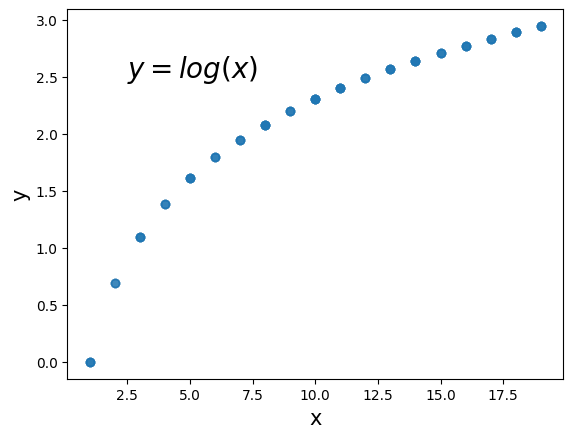

In [ ]:
plt.scatter(x,y,alpha=0.1);
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.text(2.5,2.5, r'$y = log(x)$',fontsize=20);

Create the Gradient descent function to fit the generated data to a line


Equation of the fitted line

$\hat{Y}  = B0 + B * x$

The error function has the form of

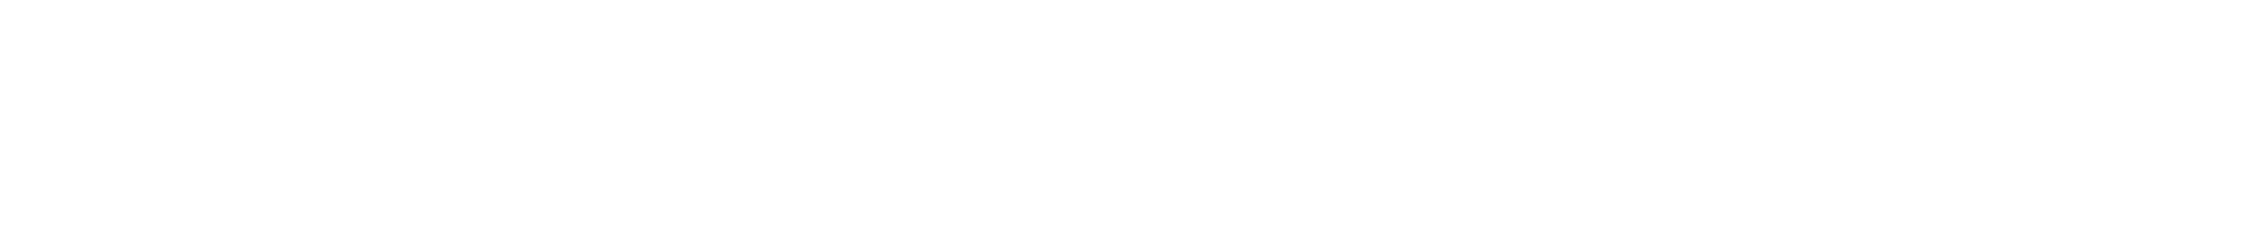

Iterate for n times (number of epochs) and at each iteration update the free paramters $B0,B$ ( Bias and weights )


$B_{new} = B_{old} -\eta ∇ MSE(B_{old})$

In [ ]:
def Grad(x,y,lr,it):
  n = len(x)
  B0=B =0
  mse,b0,b=[],[],[]
  for i in range(it):
      y_pred= B0 + B *x  # predicted y value
      MSE= 1/n*sum([error**2 for error in (y-y_pred)]) #mean squared error function
      MB0 = -2/n*sum(y- y_pred) # deffrentiated Bias
      MB = -2/n*sum(x*(y- y_pred)) # deffrentiated weight
      B0 = B0 - MB0*lr # Update the bias
      B = B - MB*lr  # Update the weight
      mse.append(MSE)
      b0.append(B0)
      b.append(B)
      #print('Bias= {:.5f}  ,B={:.5f}, MSE= {:.5f}'.format(B0,B,MSE))
  return mse,b0,b

**bold  Now the Gradient descent function has been created. Lte's run it for different iterations and learning rate values**

In [ ]:
mse1,b01,b1=Grad(x,y,0.002,15)
mse2,b02,b2=Grad(x,y,0.006,15)
mse3,b03,b3=Grad(x,y,0.007,15)

Visualize, visualize, visualize.....

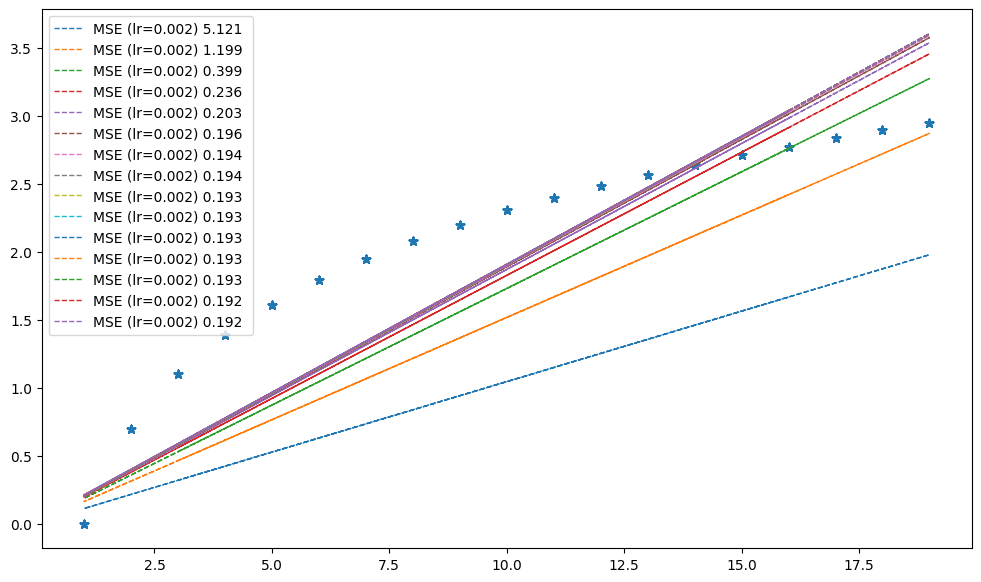

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,marker='*')
for i in range(15):
  plt.plot(x,(b01[i]+b1[i]*x),'--',label='MSE (lr=0.002) {:.3f} '.format(mse1[i]),linewidth=1)
plt.legend(loc='best');

Let's see the perfromace difference between the first and the final iteration

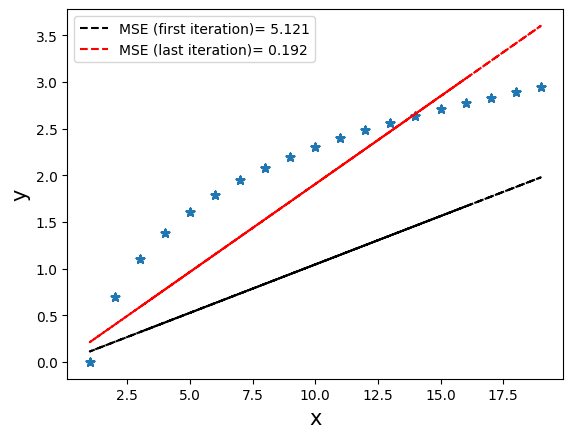

In [ ]:
plt.plot(x,(b01[0]+b1[0]*x),'k--',label='MSE (first iteration)= {:.3f}'.format(mse1[0]));
plt.plot(x,(b01[-1]+b1[-1]*x),'r--',label='MSE (last iteration)= {:.3f}'.format(mse1[-1]));
plt.scatter(x,y,marker='*');
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(loc='best');


Visualize the role of varying learning rate

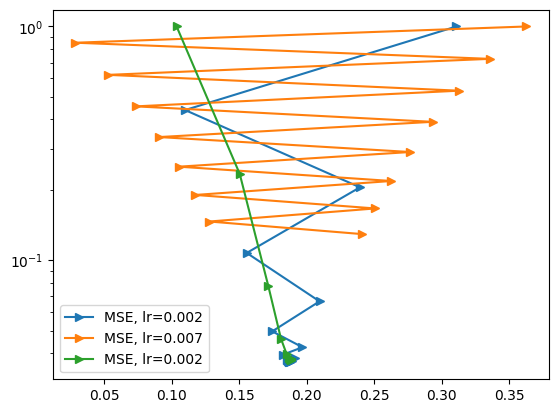

In [ ]:
plt.plot(b2,np.array(mse2)/np.array(mse2).max(),'>-',label='MSE, lr=0.002');
plt.plot(b3,np.array(mse3)/np.array(mse3).max(),'>-',label='MSE, lr=0.007');
plt.plot(b1,np.array(mse1)/np.array(mse1).max(),'>-',label='MSE, lr=0.002');

plt.legend();
plt.yscale('log')


**smaller learning rate -> better convergence to the miminum of the loss function**



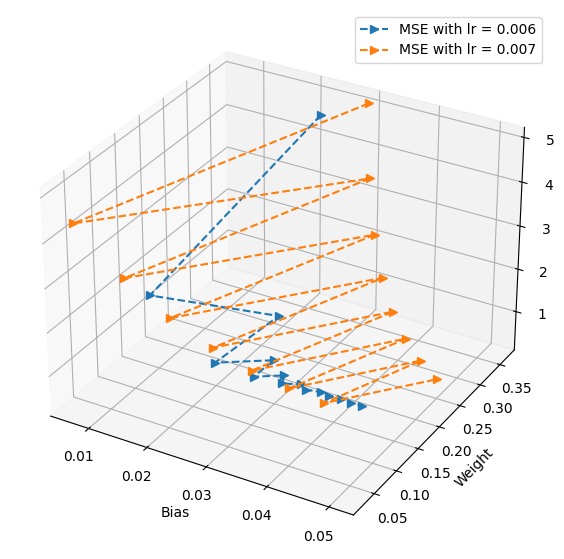

In [ ]:
fig= plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d');
ax.plot3D(b02,b2,mse2,'-->',label='MSE with lr = 0.006');
#ax.plot3D(b01,b1,mse1,linewidth=1);
ax.plot3D(b03,b3,mse3,'-->',label='MSE with lr = 0.007');
plt.xlabel('Bias');
plt.ylabel('Weight');
plt.legend(loc='best');
